#Task 3: Medical Cost Personal Datasets

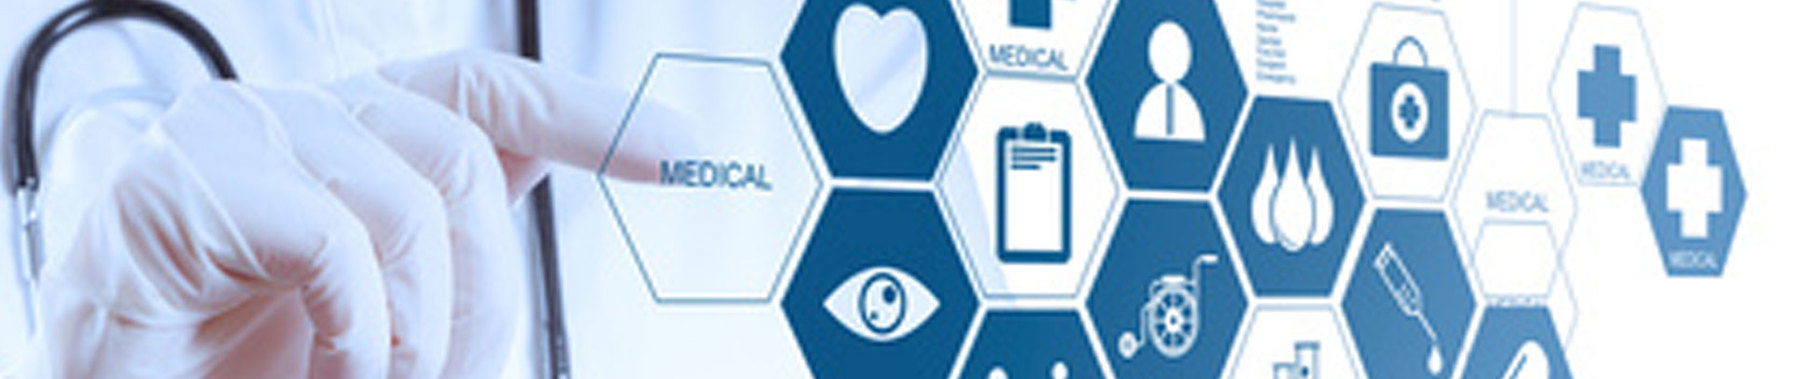
##Problem Statement

The goal of this project is to predict the insurence cost based on various features such as age, gender, bmi and more.

# I. Import & load the dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#viewing the informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#II. Data preprocessing

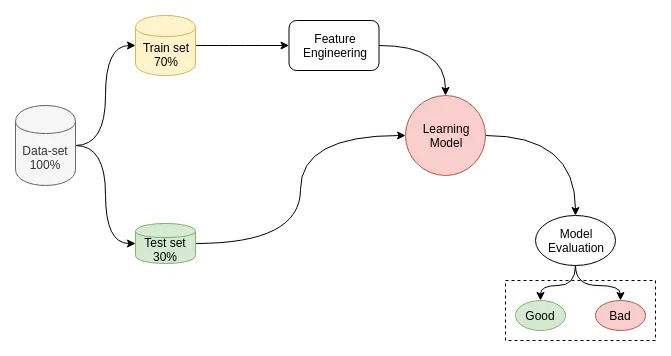




<Axes: xlabel='region', ylabel='charges'>

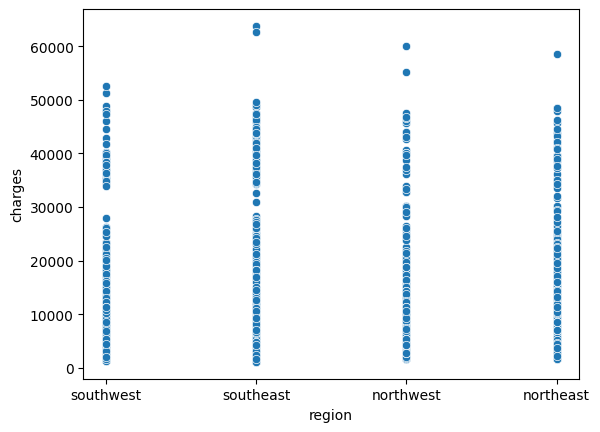

In [ ]:
#The "region" column is not important for the insurance prediction

sns.scatterplot(x="region", y="charges", data=df)
#sns.scatterplot(x="age", y="charges", data=df)
#sns.scatterplot(x="sex", y="charges", data=df)
#sns.scatterplot(x="children", y="charges", data=df)
#sns.scatterplot(x="smoker", y="charges", data=df)
#sns.scatterplot(x="bmi", y="charges", data=df)

In [ ]:
# elemention of the null values

if df.isnull().sum().sum() :
    df = df.dropna()

# elemention of string values

df['smoker'] = df['smoker'].replace(to_replace=['no' , 'yes'], value=[0,1])

df = df.drop('region' , axis = 1) #drop the region since it's not important in prediction

df = pd.get_dummies(df) # converting each text column into counter columns

# normalization for the data (Scaling column ranges to be between [-1,1])
scaler = StandardScaler()
df['charges'] = scaler.fit_transform(df[['charges']])
df['bmi'] = scaler.fit_transform(df[['bmi']])
df['age'] = scaler.fit_transform(df[['age']])

In [ ]:
df.head(10)

,age,bmi,children,smoker,charges,sex_female,sex_male
0,-1.438764,-0.453320,0,1,0.298584,1,0
1,-1.509965,0.509621,1,0,-0.953689,0,1
2,-0.797954,0.383307,3,0,-0.728675,0,1
3,-0.441948,-1.305531,0,0,0.719843,0,1
4,-0.513149,-0.292556,0,0,-0.776802,0,1
5,-0.584350,-0.807656,0,0,-0.785908,1,0
6,0.483668,0.455486,1,0,-0.415500,1,0
7,-0.157143,-0.479567,3,0,-0.494728,1,0
8,-0.157143,-0.136714,2,0,-0.567017,0,1
9,1.480485,-0.791252,0,0,1.293027,1,0


#III. Split the data into test & train sets

In [ ]:
x = df;
X = x.drop("charges" , axis = 1)
y = df["charges"];

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=100, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=100)

#IV. Train the model for prediction

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the score of the model
score = model.score(X_test, y_test)

print(f"Test score: {score}");

Test score: 0.7938983522335603


In [ ]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

#V. Evaluate & plot the model  

In [ ]:
# Assess the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.2205390589754035
R-squared: 0.7938983522335603


Text(0, 0.5, 'Residuals')

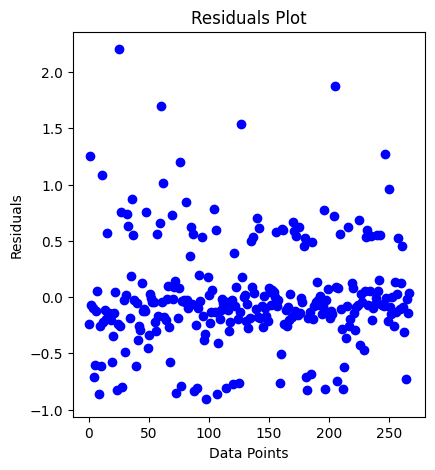

In [ ]:
# Plotting Mean Squared Error
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_test)), y_test - predictions, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Data Points')
plt.ylabel('Residuals')

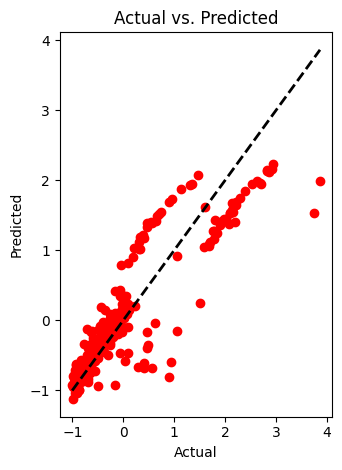

In [ ]:
# Plotting R-squared
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', linewidth=2)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()